In [1]:
import sys
import os
sys.path.append('../../ThumbStack')
sys.path.append('../../LensQuEst')
import importlib

import flat_map
importlib.reload(flat_map)
from flat_map import *

import matplotlib.pyplot as plt
import matplotlib as mpl
import cmasher as cmr
%matplotlib inline
plt.style.use('default.mplstyle')

import numpy as np
import fitsio
import pixell
importlib.reload(pixell)
from functools import partial

sys.path.append('../scripts/')
from make_noise_maps import make_cmb

In [2]:
datadir = '/home/theo/Documents/research/CMB/patchy_tau_sims/data/AdvACT_NILC_cls_fullRes_TT/'
act_ell = np.load(datadir+'ells.npy')
act_cl = np.load(datadir+'cl_tt.npy')

datadir = '/home/theo/Documents/research/CMB/patchy_tau_sims/data/noisecurve_subset/'
data = np.load(datadir + 'spt_proposal_2023_ilc_cmb_90-150-220_TT-EE_fsky1500_5years.npy', allow_pickle=True).tolist()
spt_ell = data['el']
spt_cl = data['cl_residual']['TT']

so_dat = np.genfromtxt(datadir + 'SOV3_T_default1-4-2_noisecurves_deproj0_SENS1_mask_16000_ell_TT_yy.txt')
so_ell = so_dat[:,0]
so_cl = so_dat[:,1]

so_goal_dat = np.genfromtxt(datadir + 'SOV3_T_default1-4-2_noisecurves_deproj0_SENS2_mask_16000_ell_TT_yy.txt')
so_goal_ell = so_goal_dat[:,0]
so_goal_cl = so_goal_dat[:,1]
so_goal_cl_interp = interp1d(so_goal_ell, so_goal_cl, kind='linear', bounds_error=False, fill_value=0.)
so_goal_ell_interp = np.logspace(np.log10(40), np.log10(6000), 50)

/home/theo/Documents/research/CMB/patchy_tau_sims/notebooks/../../ThumbStack/cmb.py:31: RuntimeWarning: divide by zero encountered in divide
  self.fdl_to_cl = lambda l: 1./( l*(l+1.)/(2.*np.pi) )
/home/theo/Documents/research/CMB/patchy_tau_sims/notebooks/../../ThumbStack/cmb.py:79: RuntimeWarning: invalid value encountered in multiply
  self.flensedTT = lambda l: ((l>=lmin_lensedCMB) & (l<=lmax_lensedCMB)) * self.flensedTT_template(l) * self.fdl_to_cl(l)


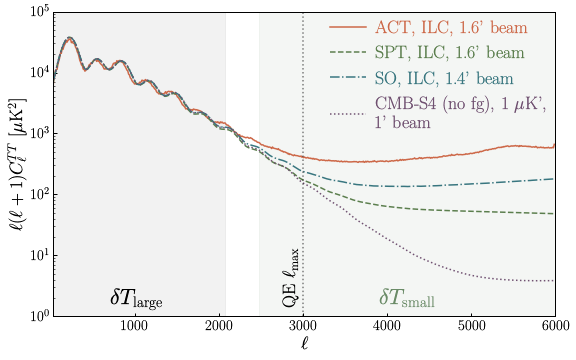

In [13]:
cols = ['#705171', '#38767F', '#5B7E4D', '#cd6848']
cols = cols[::-1]
lss = ['-', '--', '-.', ':']

beam = 1.6
noise = 5.
cmb = make_cmb(lMax=20000, beam=beam, noise=noise)
fig, ax = plt.subplots(1,1, figsize=(9,5.5), dpi=72)
# ax.plot(act_ell, act_ell**2*cmb.flensedTT(act_ell), label=r'lensed CMB', c='k')
act = ax.plot(act_ell, (act_ell**2 + act_ell)*act_cl, label="ACT, ILC, %.1f' beam"%beam, c=cols[0], ls=lss[0])

beam = 1.6
noise = 5.
cmb = make_cmb(lMax=6000, beam=beam, noise=noise)
spt = ax.plot(spt_ell, (spt_ell**2 + spt_ell)*((cmb.flensedTT(spt_ell) +spt_cl) * cmb.fbeam(spt_ell)**2),
         label="SPT, ILC, %.1f' beam"%beam, c=cols[1], ls=lss[1])

beam = 1.4
noise = 5.
cmb = make_cmb(lMax=6000, beam=beam, noise=noise)
so = ax.plot(so_goal_ell, (so_goal_ell**2 + so_goal_ell)*((cmb.flensedTT(so_goal_ell) + so_goal_cl) * cmb.fbeam(so_goal_ell)**2),
        label="SO, ILC, %.1f' beam"%beam, c=cols[2], ls=lss[2])

beam = 1.
noise = 1.
cmb = make_cmb(lMax=6000, beam=beam, noise=noise)
# ax.plot(spt_ell, spt_ell**2*((cmb.ftotal(spt_ell) - cmb.flensedTT(spt_ell)) * cmb.fbeam(spt_ell)**2),
#         label=r"CMB-S4, beam=%.1f'"%beam, c=cols[0])
s4 = ax.plot(spt_ell, (spt_ell**2 + spt_ell)*((cmb.flensedTT(spt_ell) + cmb.fdetectorNoise(spt_ell)) * cmb.fbeam(spt_ell)**2),
        label="CMB-S4 (no fg), 1 $\mu$K',\n    %i' beam"%beam, c=cols[3], ls=lss[3])

# ax.plot(tau_ell, tau_ell**2*(tau_cl),
#         label=r"$\tau$, beam=1.6'", c='r')
# ax.loglog()
l = ax.legend(loc='upper right', frameon=False, borderaxespad=0.1, handlelength=2, handletextpad=0.5,
              fancybox=False, framealpha=1., edgecolor='k', fontsize=18)
# for lh in l.legend_handles:
#     lh.set_visible(False)
l.get_frame().set_linewidth(0)
ax.set_ylim(1e0, 1e5)
ax.set_xlim(30, 6000)
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$\ell(\ell +1)C_{\ell}^{TT}$ [$\mu$K$^2$]')
ax.set_yscale('log')
ax.grid(False)
# small_color = '#626e58'
# large_color = '#86606f'
# small_color = '#5ca5b6'
small_color = '#6a8b67'
large_color = 'k'
ax.fill_between(x=[0, 2075], y1=[1e5, 1e5], color=large_color, alpha=0.05)
# ax.fill_between(x=[0, 2075], y1=[1e5, 1e5], color='#86606f', alpha=0.1)
ax.fill_between(x=[2475, 1e5], y1=[1e5, 1e5], color=small_color, alpha=0.07)
ax.axvline(3000, ls=':', c='k', alpha=0.5)
ax.text(700, 1.6, r'$\delta T_{\rm large}$', {'color': large_color, 'fontsize': 22})
ax.text(3900, 1.6, r'$\delta T_{\rm small}$', {'color': small_color, 'fontsize': 22})
ax.text(2760, 1.6, r'QE $\ell_{\rm max}$', {'color': 'k', 'fontsize': 18, 'rotation': 'vertical'})

# max_shift = max([t.get_window_extent().width for t in l.get_texts()])
# print(max_shift)
# l._legend_box.align='right'
for i, text in enumerate(l.get_texts()):
    text.set_color(cols[i])
    # text.set_ha('right')
    # temp_shift = max_shift - text.get_window_extent().width
    # print(text, text.get_window_extent().width, temp_shift)
    # text.set_position((temp_shift, 0))

fn = '/home/theo/Documents/research/CMB/patchy_tau_sims/paper_figures/noise_powspec/ti-sgn_noise_spec_linlog_v5'
plt.savefig(fn+'.pdf', dpi=72, bbox_inches='tight')
plt.savefig(fn+'.png', dpi=72, bbox_inches='tight')